In [1]:
from evaluatedetection import getfeatures, getlabels, displayframe
import shapefeatures
import matplotlib.pyplot as plt
import os
from lxml import etree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from sklearn import ensemble
import numpy as np
import glob
import pickle
import cv2
import sys

DATA_DIR = 'data/'
IMAGE_DIR = DATA_DIR + 'images/'
FEATURES_DIR = DATA_DIR + 'features/'
ANNOTATION_DIR = DATA_DIR + 'annotation/'
RESULTS_DIR = DATA_DIR + 'results/'



In [2]:
img=cv2.imread(IMAGE_DIR+"plasmodium-0000.jpg")
img.shape
shapefeatures._extract_moment_features(img[:40,:40,0]).shape
imgray=img[:40,:40,0]
#cv2.resize()
# How many gray levels to threshold at
nthresholds = 6
# Proportions of grayscale to begin and end thresholding
lowthresh = 0.15
highthresh = 0.45
minmax = cv2.minMaxLoc(imgray)
# Widen the range a bit to avoid errors in uniform image patches
minpixel = minmax[0]
maxpixel = minmax[1]

if minpixel == maxpixel:
    minpixel = max(minpixel-1, 0)
    maxpixel = min(maxpixel+1, 255)

startthresh = minpixel + (maxpixel-minpixel)*lowthresh
stopthresh = minpixel + (maxpixel-minpixel)*highthresh
stepthresh = (stopthresh-startthresh)/(nthresholds+1)
thresholds = np.arange(startthresh+stepthresh, stopthresh, stepthresh)

momentthresholds = thresholds[0:-1:2]
nmomentthresholds = len(momentthresholds)

print(thresholds)
thresholds[0:-1:2]

[155.89285714 156.53571429 157.17857143 157.82142857 158.46428571
 159.10714286 159.75      ]


array([155.89285714, 157.17857143, 158.46428571])

plasmodium-0080.jpg (1/20)
plasmodium-0084.jpg (2/20)
plasmodium-0033.jpg (3/20)
plasmodium-0081.jpg (4/20)
plasmodium-0093.jpg (5/20)
plasmodium-0017.jpg (6/20)
plasmodium-0036.jpg (7/20)
plasmodium-0082.jpg (8/20)
plasmodium-0069.jpg (9/20)
plasmodium-0065.jpg (10/20)
plasmodium-0092.jpg (11/20)
plasmodium-0039.jpg (12/20)
plasmodium-0056.jpg (13/20)
plasmodium-0052.jpg (14/20)
plasmodium-0051.jpg (15/20)
plasmodium-0032.jpg (16/20)
plasmodium-0031.jpg (17/20)
plasmodium-0044.jpg (18/20)
plasmodium-0078.jpg (19/20)
plasmodium-0010.jpg (20/20)


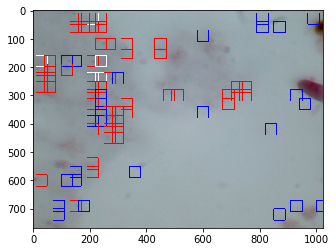

In [6]:
featureset = [3,7,11,12,15,17]
num_files = 100
train_set_proportion = .8
test_set_proportion = 1 - train_set_proportion
filters = [[11,'>',1000]]
centiles = [0,25,50,75,100]
size = 40
step = 30
reusefeatures = False
savefeatures = True
reuseclassifier = True
saveclassifier = True
saveresults = True

# Split up image files into training and test sets
imgfilenames = glob.glob(IMAGE_DIR + '*.jpg')

baseimgfilenames = [os.path.basename(imgfilenames[i])
                    for i in range(num_files)]

train, test = train_test_split(np.arange(num_files),
                               train_size=train_set_proportion,
                               test_size=test_set_proportion,
                               random_state=1)

trainfiles = [baseimgfilenames[i] for i in train]
testfiles = [baseimgfilenames[i] for i in test]

Xtest = getfeatures(testfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures,
                    savetofile=savefeatures,
                    filename='Xtest.npy')

ytest = getlabels(testfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')

classifier = pickle.load(open(FEATURES_DIR + 'classifier.pkl', 'rb'))

predictions = classifier.predict_proba(Xtest)[:,1]
for i, img_name in enumerate(testfiles):
        img = (cv2.imread(IMAGE_DIR+"{}".format(img_name)))
        output = displayframe(img=img, predictions=predictions[i*850:(i+1)*850], labels=ytest[i*850:(i+1)*850], threshold=0.2, size=size, step=step)
        plt.imshow(img)
        cv2.imwrite(img_name, output)


In [4]:
featureset = [3,7,11,12,15,17]
num_files = 2700
train_set_proportion = .8
test_set_proportion = 1 - train_set_proportion
filters = [[11,'>',1000]]
centiles = [0,25,50,75,100]
size = 40
step = 30
reusefeatures = True
savefeatures = True
reuseclassifier = True
saveclassifier = True
saveresults = True

# Split up image files into training and test sets
imgfilenames = glob.glob(IMAGE_DIR + '*.jpg')

baseimgfilenames = [os.path.basename(imgfilenames[i]) 
                    for i in range(num_files)]                            

train, test = train_test_split(np.arange(num_files),
                               train_size=train_set_proportion,
                               test_size=test_set_proportion,
                               random_state=1)  

trainfiles = [baseimgfilenames[i] for i in train]
testfiles = [baseimgfilenames[i] for i in test]


print 'Extracting features from training images...'
Xtrain = getfeatures(trainfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtest.npy') 

ytrain = getlabels(trainfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')     



print 'Extracting features from testing images...'
Xtest = getfeatures(testfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtest.npy') 

ytest = getlabels(testfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')     

if reuseclassifier:
    classifier = pickle.load(open(FEATURES_DIR + 'classifier.pkl', 'rb')) 

else:
    print 'Training...'
    classifier = ensemble.ExtraTreesClassifier(n_estimators=500, 
                                           max_depth=10, n_jobs=-1)
    classifier.fit(Xtrain,ytrain)

if saveclassifier:
    pickle.dump(classifier, open(FEATURES_DIR + 'classifier.pkl', 'wb'))


print 'Testing...'
predictions = classifier.predict_proba(Xtest)[:,1]

# Assume that examples with all-zero features (no shapes in patch) are negative    
negativetest = Xtest[:,0]==0
predictions[negativetest]=0
ytest[negativetest]=0

# Calculate the performance
precision, recall, thresholds = precision_recall_curve(
                                    ytest, predictions)

area = auc(recall, precision)
print("Area under precision-recall curve: %0.2f" % area)

fig = pl.figure()
fig.set_size_inches(4,4)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC=%0.2f' % area)

if saveresults:
    np.save('data/results/predictions.npy', predictions)
    pickle.dump(classifier, open(RESULTS_DIR + 'classifier.pkl', 'wb'))


Extracting features from training images...
Extracting features from testing images...
Testing...
Area under precision-recall curve: 0.45


NameError: name 'pl' is not defined

In [ ]:
evaluatedetection.get_bounding_boxes_for_single_image('data/annotation/plasmodium-2650.xml')